In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
file_path = "Desktop\Classes\ExcelR\Assignments\Assignment - 6\MLR\MLR\ToyotaCorolla - MLR.csv"

In [3]:
df = pd.read_csv(file_path)

In [4]:
df.head(10)

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
5,12950,32,61000,Diesel,90,0,2000,3,4,5,1170
6,16900,27,94612,Diesel,90,0,2000,3,4,5,1245
7,18600,30,75889,Diesel,90,0,2000,3,4,5,1245
8,21500,27,19700,Petrol,192,0,1800,3,4,5,1185
9,12950,23,71138,Diesel,69,0,1900,3,4,5,1105


In [5]:
df.tail(10)

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
1426,9950,78,30964,Petrol,110,1,1600,3,4,4,1080
1427,8950,71,29000,Petrol,86,1,1300,3,4,5,1045
1428,8450,72,26000,Petrol,86,0,1300,3,4,5,1015
1429,8950,78,24000,Petrol,86,1,1300,5,4,5,1065
1430,8450,80,23000,Petrol,86,0,1300,3,4,5,1015
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015
1435,6950,76,1,Petrol,110,0,1600,5,4,5,1114


In [6]:
data = df.copy()

In [7]:
data_renamed = data.rename(columns={"Age_08_04":"Age", "Fuel_Type":"Fuel","cc":"CC"},inplace=True)

In [8]:
data_renamed = data
print(data.head())

   Price  Age     KM    Fuel  HP  Automatic    CC  Doors  Cylinders  Gears  \
0  13500   23  46986  Diesel  90          0  2000      3          4      5   
1  13750   23  72937  Diesel  90          0  2000      3          4      5   
2  13950   24  41711  Diesel  90          0  2000      3          4      5   
3  14950   26  48000  Diesel  90          0  2000      3          4      5   
4  13750   30  38500  Diesel  90          0  2000      3          4      5   

   Weight  
0    1165  
1    1165  
2    1165  
3    1165  
4    1170  


In [9]:
## Summary
data.describe(include='all')

,Price,Age,KM,Fuel,HP,Automatic,CC,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
unique,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Petrol,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1264,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,10730.824513,55.947075,68533.259749,NaN,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,NaN,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,NaN,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,NaN,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,NaN,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,NaN,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000


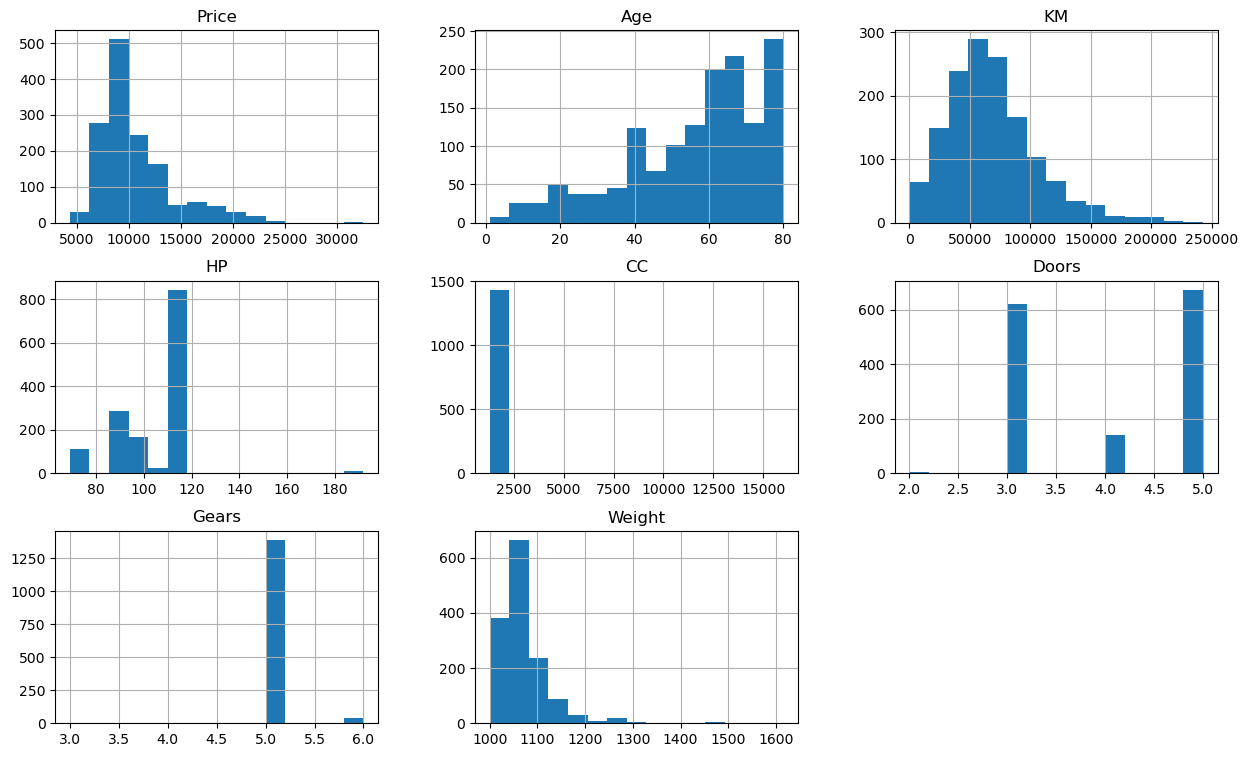

In [10]:
## plot histogram for numerical columns
numerical_col = ["Price", "Age", "KM", "HP", "CC", "Doors", "Gears", "Weight"]
data[numerical_col].hist(bins=15, figsize=(15,9), layout=(3,3))
plt.show()

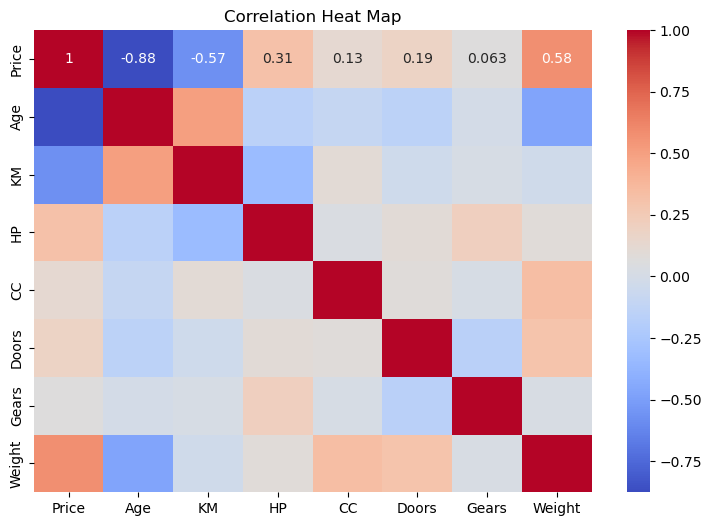

In [11]:
## plot correlation heatmap of numerical values
plt.figure(figsize=(9,6))
sns.heatmap(data[numerical_col].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heat Map")
plt.show()

In [12]:
# checking for null values
data.isna().sum()

Price        0
Age          0
KM           0
Fuel         0
HP           0
Automatic    0
CC           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [13]:
#Encoding catagorical values
data = pd.get_dummies(data, columns=["Fuel"], drop_first=True)

In [14]:
# defining feature scaling
scaler = StandardScaler()
scaled_feature = scaler.fit_transform(data[numerical_col])
print(scaled_feature)

[[ 0.76376268 -1.77196633 -0.57469494 ... -1.08513865 -0.14042519
   1.75856113]
 [ 0.83271485 -1.77196633  0.11745379 ... -1.08513865 -0.14042519
   1.75856113]
 [ 0.88787659 -1.71818412 -0.71538641 ... -1.08513865 -0.14042519
   1.75856113]
 ...
 [-0.6152808   0.80957948 -1.37403589 ... -1.08513865 -0.14042519
  -1.09191497]
 [-0.96004167  0.75579727 -1.37670303 ... -1.08513865 -0.14042519
  -1.09191497]
 [-1.04278428  1.0784905  -1.82784925 ...  1.014941   -0.14042519
   0.78939926]]


In [15]:
data[numerical_col] = scaled_feature

In [39]:
## spliting the data set in X and Y variables
X = data.drop('Price', axis=1)
Y = data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test

(           Age        KM        HP  Automatic        CC     Doors  Cylinders  \
 899   0.325540 -0.246397 -1.035138          0 -0.652594  1.014941          4   
 881   0.648233 -0.185773  0.567440          0  0.054555 -0.035099          4   
 310  -0.857669 -0.796947  0.567440          0  0.054555  1.014941          4   
 1145  1.024708  0.888736  0.567440          0  0.054555  1.014941          4   
 31   -1.825749 -0.889070 -0.300623          0 -0.416878 -1.085139          4   
 ...        ...       ...       ...        ...       ...       ...        ...   
 1095  1.078490  1.526796  0.567440          0  0.054555 -1.085139          4   
 1130  0.917144  1.028841  0.567440          0  0.054555 -1.085139          4   
 1294  1.293619  0.085528  0.567440          0  0.054555  1.014941          4   
 860   0.379322 -0.102505 -1.035138          0 -0.652594 -1.085139          4   
 1126  1.293619  1.105975  0.567440          0  0.054555 -0.035099          4   
 
          Gears    Weight 

In [41]:
# building model and saving ot on models
models = {}

In [43]:
# model1 = linear regression with all features
lr1 = LinearRegression()
lr1.fit(X_train,y_train)
models['Linear Regression (all features)'] = lr1

In [45]:
# model2 - Linear regression with selective features
selected_feature = ["Age", "KM", "HP", "Weight", "Fuel_Petrol", "Fuel_Diesel"]
lr2 = LinearRegression()
lr2.fit(X_train[selected_feature], y_train)
models['Linear Regression (selected feature)'] = lr2

In [85]:
# model3 - Linear Regression with ploynomial features
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
lr3 = LinearRegression()
lr3.fit(X_train_poly, y_train)
models['Linear Regression (Polynomial features)'] = lr3 

In [87]:
## Model evalutation
for name, model in models.items():
    if 'Polynomial' in name:
        y_pred = model.predict(X_test_poly)
    else:
        y_pred = model.predict(X_test[selected_feature] if 'selected' in name else X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name} - MSE: {mse}, R2: {r2}')
    

Linear Regression (all features) - MSE: 0.16758650548094217, R2: 0.834888804061108
Linear Regression (selected feature) - MSE: 0.1685812647157578, R2: 0.8339087377576768
Linear Regression (Polynomial features) - MSE: 0.24330211306668797, R2: 0.7602915416869965


In [71]:
# Applying Lasso and Ridge methods
lasso = Lasso(alpha=0.1)
ridge = Ridge(alpha=1.0)

In [74]:
# Fitting Lasso
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f'Lasso Regression - MSE: {mse_lasso}, R2: {r2_lasso}')

Lasso Regression - MSE: 0.17400385240333016, R2: 0.8285662435299396


In [77]:
# Fitting Ridge
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f'Ridge Regression - MSE: {mse_ridge}, R2: {r2_ridge}')

Ridge Regression - MSE: 0.16716150986221212, R2: 0.8353075223503637
